In [1]:
import os
import pandas as pd

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
import seaborn as sns

In [2]:
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, \
    load_robot_execution_failures
download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()

/home/user/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


The first column is the DataFrame index and has no meaning here. 
There are six different time series (a-f) for the different sensors. 
The different robots are denoted by the ids column.

In [3]:
timeseries.head()

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0


In [4]:
y.head()

1    True
2    True
3    True
4    True
5    True
dtype: bool

In [5]:
print ('{} failures out of {} '.format(len(y[y]),len(y)))

21 failures out of 88 


In [6]:
# Create plots with pre-defined labels.

ax.plot(a, c, 'k--', label='Model length')
ax.plot(a, d, 'k:', label='Data length')
ax.plot(a, c + d, 'k', label='Total message length')



# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('#00FFCC')

plt.show()

NameError: name 'ax' is not defined

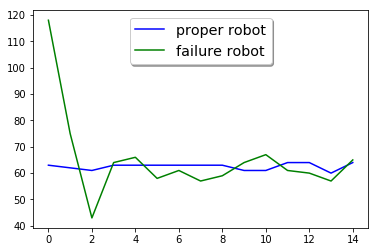

In [7]:

ts1 = timeseries[timeseries.id == 1]
ts20 = timeseries[timeseries.id == 20]
fig, ax = plt.subplots()
ax.plot(ts1.time,ts1.F_z, 'b',label='proper robot' ) 
ax.plot(ts20.time,ts20.F_z, 'g' ,label='failure robot') 
legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')

plt.show()


You can already see some differences by eye - but for successful machine learning we have to put these differences into numbers.

For this, tsfresh comes into place. It allows us to automatically extract over 1200 features from those six different time series for each robot.

For extracting all features, we do:



In [8]:
from tsfresh import extract_features
extracted_features = extract_features(timeseries, column_id="id", column_sort="time")

Feature Extraction: 100%|██████████| 10/10 [00:14<00:00,  1.50s/it]


You end up with a DataFrame extracted_features with all more than 1200 different extracted features. 

In [9]:
extracted_features.head()

variable,F_x__abs_energy,F_x__absolute_sum_of_changes,"F_x__agg_autocorrelation__f_agg_""mean""","F_x__agg_autocorrelation__f_agg_""median""","F_x__agg_autocorrelation__f_agg_""var""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,T_z__time_reversal_asymmetry_statistic__lag_1,T_z__time_reversal_asymmetry_statistic__lag_2,T_z__time_reversal_asymmetry_statistic__lag_3,T_z__value_count__value_-inf,T_z__value_count__value_0,T_z__value_count__value_1,T_z__value_count__value_inf,T_z__value_count__value_nan,T_z__variance,T_z__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
1,14.0,2.0,-0.106351,-7.206633e-02,0.016879,0.0,-1.0,-1.0,0.0,NaN,...,0.000000,0.000000,0.000000,0.0,15.0,0.0,0.0,0.0,0.000000,0.0
2,25.0,14.0,-0.039098,-4.935275e-02,0.088790,0.0,0.0,0.0,0.0,NaN,...,0.000000,0.000000,0.000000,0.0,11.0,0.0,0.0,0.0,0.195556,0.0
3,12.0,10.0,-0.029815,1.301043e-17,0.105435,1.0,-1.0,-2.0,0.0,NaN,...,0.000000,-0.090909,0.000000,0.0,11.0,0.0,0.0,0.0,0.195556,0.0
4,16.0,17.0,-0.049773,-6.417112e-02,0.143580,1.0,-1.0,-1.0,0.0,NaN,...,0.000000,-0.181818,0.000000,0.0,8.0,1.0,0.0,0.0,0.355556,0.0
5,17.0,13.0,-0.061467,-5.172414e-02,0.052642,2.0,-1.0,-2.0,0.0,NaN,...,-0.076923,-0.090909,-0.222222,0.0,9.0,2.0,0.0,0.0,0.382222,0.0


We will now remove all NaN values (that were created by feature calculators, than can not be used on the given data, e.g. because it has too low statistics) and select only the relevant features next:

In [10]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
impute(extracted_features)
features_filtered = select_features(extracted_features, y)




 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"'
 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"' ...,
 'T_z__fft_coefficient__coeff_9__attr_"imag"'
 'T_z__fft_coefficient__coeff_9__attr_"real"'
 'T_z__spkt_welch_density__coeff_8'] did not have any finite values. Filling with zeros.


In [11]:
print('{} features after feature selection '.format(len(features_filtered.columns)))

623 features after feature selection 


Further, you can even perform the extraction, imputing and filtering at the same time with the tsfresh.extract_relevant_features() function:

In [12]:
from tsfresh import extract_relevant_features

features_filtered_direct = extract_relevant_features(timeseries, y,
                                                     column_id='id', column_sort='time')

Feature Extraction: 100%|██████████| 10/10 [00:14<00:00,  1.49s/it]
 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"'
 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"' ...,
 'T_z__fft_coefficient__coeff_9__attr_"imag"'
 'T_z__fft_coefficient__coeff_9__attr_"real"'
 'T_z__spkt_welch_density__coeff_8'] did not have any finite values. Filling with zeros.


In [13]:
len(features_filtered_direct.columns)

623

### Try on mode detection data 

In [20]:
## consts :
dataSource = r'../raw-data/utf8'
SAMPLE_FREQ = 50 
FILE_MARGINES = 2* SAMPLE_FREQ  ## number of samples to ignore in the  start and in the end of the file (5 seconds )  
WINDOW_SIZE = 2 * 128  ## sliding window size 
PEAKS_WINDOW_SIZE = 5*WINDOW_SIZE  ## sliding window size for peaks count feature

DEVICE_MODE_LABELS = ['pocket','swing','texting','talking','whatever'] 
USER_MODE_LABELS = ['walking','fastwalking','stairs','static','whatever'] 


In [21]:
def loadFile(root,file):
    data=pd.read_csv(os.path.join(root,file))
    
    print('loading : ' , file) 

    print('loading : ' , len(data) , ' samples from ', file) 
    
    ## usefull property : 
    data['source']=file  

    ## default label values in case file name not contains label  
    data['devicemodeDescription']=DEVICE_MODE_LABELS[-1] ## 'whatever' label 
    data['devicemode'] = len(DEVICE_MODE_LABELS)

    ## search device mode label in file name and add as new properties :
    for label in DEVICE_MODE_LABELS:
        if label.lower() in file.lower():  
            data['devicemodeDescription']=label         ## label name 
            data['devicemode'] = DEVICE_MODE_LABELS.index(label)    ## label index 
            break
           
    ## crop samples from start and from the end of the file :
    margin = min(len(data) / 2 - 1 , FILE_MARGINES)
    data.drop(data.index[range(0,margin)],axis=0,inplace=True)
    data.drop(data.index[range(-margin,-1)],axis=0,inplace=True)   
    ##  print(len(data) , ' samples after cropping ' , margin , 'samples from start-end of the file  ')
    return data 

In [22]:
def loadFiles(inputDir):
    print ('loading files from : ' , inputDir )
    return pd.concat([loadFile(inputDir,f) for f in os.listdir(inputDir) if f.lower().endswith('.csv')])  

In [23]:
rdf = loadFiles(dataSource)
print('=========================================================')
print( 'total train samples ' , len(rdf) , ' from ' ,len(rdf.source.unique()),  ' files ')

loading files from :  ../raw-data/utf8
loading :  swing4.csv
loading :  6784  samples from  swing4.csv
loading :  TextingPointingDorwatd.csv
loading :  6674  samples from  TextingPointingDorwatd.csv
loading :  TalkingLeftHandNight1.csv
loading :  7360  samples from  TalkingLeftHandNight1.csv
loading :  SwingLeftNormal.csv
loading :  5874  samples from  SwingLeftNormal.csv
loading :  PocketLeftAidePhoneDownScBodyLoose.csv
loading :  8756  samples from  PocketLeftAidePhoneDownScBodyLoose.csv
loading :  SwingRightPhoneDownScBody.csv
loading :  9258  samples from  SwingRightPhoneDownScBody.csv
loading :  TextingRight.csv
loading :  5809  samples from  TextingRight.csv
loading :  SwingRight2.csv
loading :  7244  samples from  SwingRight2.csv
loading :  LeftPocketJeansNormalWalk.csv
loading :  6573  samples from  LeftPocketJeansNormalWalk.csv
loading :  RightPocket.csv
loading :  7486  samples from  RightPocket.csv
loading :  Texting2.csv
loading :  4268  samples from  Texting2.csv
loading :

In [24]:
rdf.drop(u'Unnamed: 11',inplace=True,axis=1)
rdf.drop(u'Unnamed: 12',inplace=True,axis=1)
rdf.drop(u'Unnamed: 17',inplace=True,axis=1)

In [25]:
rdf.groupby('devicemodeDescription').devicemode.count()

devicemodeDescription
pocket     36659
swing      74063
talking    20789
texting    16154
Name: devicemode, dtype: int64

In [26]:
rdf.columns

Index(['Bx', 'By', 'Bz', 'I', 'Latitude', 'Longitude', 'Speed (m/s)', 'ax',
       'ay', 'az', 'devicemode', 'devicemodeDescription', 'gFy', 'gFz', 'gfx',
       'p', 'source', 'time', 'wx', 'wy', 'wz'],
      dtype='object')

In [64]:

timeseries = rdf[['gFy', 'gFz', 'gfx','time', 'wx', 'wy', 'wz']].copy()

timeseries['id'] = range(0, len(timeseries))
timeseries.fillna(0,inplace=True)
y = rdf[u'devicemode']
print(timeseries.head())

        gFy     gFz     gfx   time      wx      wy      wz  id
100 -0.7505 -0.0638 -0.6622  2.185 -0.1004 -0.1224  0.0791   0
101 -0.7505 -0.0638 -0.6622  2.226  0.3045  0.3562 -0.2617   1
102 -0.7505 -0.0638 -0.6622  2.228  0.3045  0.3562 -0.2617   2
103 -0.7961 -0.0649 -0.6791  2.259  0.3045  0.3562 -0.2617   3
104 -0.7961 -0.0649 -0.6791  2.266  0.3045  0.3562 -0.2617   4


In [65]:
y.head()

100    1
101    1
102    1
103    1
104    1
Name: devicemode, dtype: int64

In [66]:
### Use TSFresh for feature extraction : TODO  calc norm and dir for each vector 

In [ ]:
extracted_features = extract_features(timeseries, column_id="id", column_sort="time")

Feature Extraction:   0%|          | 0/10 [00:00<?, ?it/s]Process ForkPoolWorker-14:
Traceback (most recent call last):
  File "/home/user/anaconda3/lib/python3.6/multiprocessing/pool.py", line 125, in worker
    put((job, i, result))
  File "/home/user/anaconda3/lib/python3.6/multiprocessing/queues.py", line 341, in put
    obj = _ForkingPickler.dumps(obj)
  File "/home/user/anaconda3/lib/python3.6/multiprocessing/reduction.py", line 51, in dumps
    cls(buf, protocol).dump(obj)
MemoryError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/user/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/user/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/user/anaconda3/lib/python3.6/multiprocessing/pool.py", line 127, in worker
    wrapped = MaybeEncodingError(e, result[1])
  File "/home/use

  File "/home/user/anaconda3/lib/python3.6/multiprocessing/reduction.py", line 51, in dumps
    cls(buf, protocol).dump(obj)
MemoryError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/user/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/user/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/user/anaconda3/lib/python3.6/multiprocessing/pool.py", line 130, in worker
    put((job, i, (False, wrapped)))
  File "/home/user/anaconda3/lib/python3.6/multiprocessing/queues.py", line 341, in put
    obj = _ForkingPickler.dumps(obj)
  File "/home/user/anaconda3/lib/python3.6/multiprocessing/reduction.py", line 51, in dumps
    cls(buf, protocol).dump(obj)
OverflowError: cannot serialize a string larger than 4GiB
Process ForkPoolWorker-22:
Traceback (most recent call last):
  File "/home/user

In [58]:
len(extracted_features)

22

In [59]:
extracted_features.head(80)

variable,Bx__abs_energy,Bx__absolute_sum_of_changes,"Bx__agg_autocorrelation__f_agg_""mean""","Bx__agg_autocorrelation__f_agg_""median""","Bx__agg_autocorrelation__f_agg_""var""","Bx__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","Bx__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","Bx__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","Bx__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","Bx__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,wz__time_reversal_asymmetry_statistic__lag_1,wz__time_reversal_asymmetry_statistic__lag_2,wz__time_reversal_asymmetry_statistic__lag_3,wz__value_count__value_-inf,wz__value_count__value_0,wz__value_count__value_1,wz__value_count__value_inf,wz__value_count__value_nan,wz__variance,wz__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
LeftPocketJeansNormalWalk.csv,2.865337e+06,4299.9121,0.952840,0.952185,0.000389,-9.534100,0.234867,0.026203,0.004300,-6.600893,...,-0.001701,-0.003351,-0.004483,0.0,0.0,0.0,0.0,0.0,0.450975,0.0
Pocket2.csv,3.915776e+06,11878.9739,0.465876,0.418710,0.047562,-20.351699,0.338990,0.018211,0.001805,-17.011903,...,-0.041997,-0.083524,-0.125221,0.0,0.0,0.0,0.0,0.0,1.575321,1.0
PocketLeftAidePhoneDownScBodyLoose.csv,4.554989e+06,10287.0734,0.920043,0.912592,0.000556,44.849971,-0.926514,-0.084859,0.001179,49.886514,...,0.004319,0.009012,0.013598,0.0,10.0,0.0,0.0,0.0,1.190108,1.0
PocketLeftNormalWalking.csv,3.256907e+06,6717.4806,0.192937,0.093260,0.071627,26.926529,-0.139414,-0.003303,0.000934,29.730042,...,0.051635,0.103293,0.154984,0.0,0.0,0.0,0.0,0.0,2.177514,1.0
RightPocket.csv,5.437652e+06,10315.4603,0.582887,0.510479,0.016643,-17.424893,-0.243332,-0.010015,0.001481,-13.885281,...,0.539451,1.077094,1.615031,0.0,0.0,0.0,0.0,0.0,2.330732,1.0
SwingLeftNormal.csv,1.006006e+06,5261.2680,0.389345,0.398328,0.136519,6.899836,0.615592,0.026551,0.001429,12.641958,...,0.002191,0.003898,0.005607,0.0,0.0,0.0,0.0,0.0,1.161875,1.0
SwingRight2.csv,6.075368e+06,7751.9868,0.537053,0.510819,0.068403,-4.971075,-0.624527,-0.045604,0.002151,6.132177,...,-0.096109,-0.192272,-0.288489,0.0,0.0,0.0,0.0,0.0,3.859258,1.0
SwingRightPhoneDown.csv,1.107319e+07,9434.8657,0.762796,0.756569,0.010821,-57.206631,0.714338,0.075409,0.002725,-58.488940,...,-0.272189,-0.546397,-0.816979,0.0,0.0,0.0,0.0,0.0,3.445520,1.0
SwingRightPhoneDownScBody.csv,1.013725e+07,6100.4033,0.739397,0.716000,0.016397,-14.485477,-0.637719,-0.031119,0.001250,-7.270873,...,-0.150340,-0.290782,-0.431286,0.0,0.0,0.0,0.0,0.0,4.493443,1.0


In [52]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
impute(extracted_features)
features_filtered = select_features(extracted_features, y)

 'I__friedrich_coefficients__m_3__r_30__coeff_1'
 'I__friedrich_coefficients__m_3__r_30__coeff_2'
 'I__friedrich_coefficients__m_3__r_30__coeff_3'
 'I__max_langevin_fixed_point__m_3__r_30'
 'Longitude__friedrich_coefficients__m_3__r_30__coeff_0'
 'Longitude__friedrich_coefficients__m_3__r_30__coeff_1'
 'Longitude__friedrich_coefficients__m_3__r_30__coeff_2'
 'Longitude__friedrich_coefficients__m_3__r_30__coeff_3'
 'Longitude__max_langevin_fixed_point__m_3__r_30'
 'Speed (m/s)__friedrich_coefficients__m_3__r_30__coeff_0'
 'Speed (m/s)__friedrich_coefficients__m_3__r_30__coeff_1'
 'Speed (m/s)__friedrich_coefficients__m_3__r_30__coeff_2'
 'Speed (m/s)__friedrich_coefficients__m_3__r_30__coeff_3'
 'Speed (m/s)__max_langevin_fixed_point__m_3__r_30'] did not have any finite values. Filling with zeros.


ValueError: Index of X must be a subset of y's index

cross_validation ( group by source proprty )
K-fold iterator variant with non-overlapping groups. The same group will not appear in two different folds The number of distinct groups has to be at least equal to the number of folds. The folds are approximately balanced in the sense that the number of distinct groups is approximately the same in each fold.

In [ ]:
k= 4 ## len(rdf.source.unique()) 
x_train= extracted_features
y_train = y
forest = RandomForestClassifier()
tree = DecisionTreeClassifier()
knn5 = KNeighborsClassifier(n_neighbors=5)
lin_svm = svm.LinearSVC() ## (C=1.0, class_weight=None, dual=True, fit_intercept=True,
                         ## intercept_scaling=1, loss='squared_hinge', max_iter=1000,
                         ## multi_class='ovr', penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [ ]:
def sourceFold(): 
    print ('list of source files for each kfold : ' )    
    _kfold = GroupKFold(n_splits=k) 
    _itr = _kfold.split(x_train, y_train, groups=rdf.source)  
    c = 0 
    sf = {}
    for i in _itr:
        ## print (c , str(rdf.iloc[i[1]].source.unique()))
        sf[c]= str(rdf.iloc[i[1]].source.unique())
        c = c+1
    return sf 

In [ ]:
def CalcKFoldAccuracy(classifier,X,Y,k):
    group_kfold = GroupKFold(n_splits=k)     
    groups_itr = group_kfold.split(X, Y, groups=rdf.source)    
    return cross_val_score(classifier, X, Y, cv=groups_itr, scoring='accuracy')

In [ ]:
print ('KNN : ')
print (CalcKFoldAccuracy(knn5,x_train,y_train,k))
print ('RF : ')
print (CalcKFoldAccuracy(forest,x_train,y_train,k))
print ('SVM : ')
print (CalcKFoldAccuracy(lin_svm,x_train,y_train,k))